In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

#### Carregando o vocabulário

In [2]:
import json

with open('./data/vocab.json', 'r') as infile:
    vocab = json.load(infile)

vocabSize = len(vocab['idx'])

print('Vocabulary size:', vocabSize)

Vocabulary size: 15244


### Configurações e Hiperparâmetros

In [3]:
import torch
import torch.nn as nn
from data import get_loaders
from train import train, test, check_input
from matplotlib import pyplot as plt

In [4]:
classes = [
  'negative',
  'somewhat negative',
  'neutral',
  'somewhat positive',
  'positive'
]

In [5]:
def plot_instance(instance_id):
    text = train_loader.dataset.texts[instance_id]
    label = train_loader.dataset.labels[instance_id]
    label_str = classes[train_loader.dataset.labels[instance_id]]
    print('\nExample:')
    print(text)
    print('Label:', label, '-', label_str)

In [6]:
data_path = './data/'
device_name = 'cuda'
batch_size = 1024
nb_epochs = 12
log_interval = 5
lr = 1e-2
lr_step = 3
num_layers = 3
dropout=0.2

In [7]:
device = torch.device(device_name)

train_loader, valid_loader = get_loaders(
    data_path=data_path, 
    batch_size=batch_size, 
    splits=['train', 'valid'],
)

nb_words = len(train_loader.dataset.vocab)

print(
    'Train size: ', 
    len(train_loader.dataset.texts),
    len(train_loader.dataset.labels)
)
print(
    'Valid size : ', 
    len(valid_loader.dataset.texts),
    len(valid_loader.dataset.labels)
)

plot_instance(0)
plot_instance(1015)
plot_instance(5136)
plot_instance(8974)


Train size:  99878 99878
Valid size :  24970 24970

Example:
a zombie
Label: 2 - neutral

Example:
the assumption
Label: 2 - neutral

Example:
hilarious and
Label: 4 - positive

Example:
good cast
Label: 3 - somewhat positive


In [8]:
def average_pooling(instances, lens):
    return torch.stack([
        text[:l].mean(0) for text, l in zip(instances, lens)
    ])


class TextLSTM(nn.Module):
    def __init__(self, num_embeddings=vocabSize, embedding_dim=100):
        '''
            num_embeddings: number of words in the dictionary
            embedding_dim: size of the word-embedding vector
        '''
        super(TextLSTM, self).__init__()
        self.embedding = nn.Embedding(
            num_embeddings=num_embeddings, 
            embedding_dim=embedding_dim,
        )
        self.rnn = nn.LSTM(
            input_size=100, hidden_size=32, 
            batch_first=True, bidirectional=True,
            num_layers=num_layers, dropout=dropout
        )
        self.fc = nn.Linear(32*2, len(classes))
        
    def forward(self, x, lengths):
        # Transforma índices das palavras em vetores 
        x = self.embedding(x)
        # Processa vetores das palavras com uma rede recorrente
        hidden, output = self.rnn(x)
        # Faz a média das ativações de todas as iterações recorrentes
        vector = average_pooling(hidden, lengths)
        # Camada linear para classificacao
        x = self.fc(vector)
        return x


In [9]:
model = TextLSTM()
model = model.to(device)

dummy_pred = check_input(model, device)

Passed


In [10]:
optimizer = torch.optim.Adam(model.parameters(), lr=lr)
lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=lr_step)

In [11]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Luciano\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

### Treino e Validação


* * * Training * * *
Train Epoch:   1 [     0/ 99878 (0%)]	Loss: 1.651035
Train Epoch:   1 [  5120/ 99878 (5%)]	Loss: 1.304348
Train Epoch:   1 [ 10240/ 99878 (10%)]	Loss: 1.238077
Train Epoch:   1 [ 15360/ 99878 (15%)]	Loss: 1.249756
Train Epoch:   1 [ 20480/ 99878 (20%)]	Loss: 1.218049
Train Epoch:   1 [ 25600/ 99878 (26%)]	Loss: 1.188002
Train Epoch:   1 [ 30720/ 99878 (31%)]	Loss: 1.168289
Train Epoch:   1 [ 35840/ 99878 (36%)]	Loss: 1.183104
Train Epoch:   1 [ 40960/ 99878 (41%)]	Loss: 1.167253
Train Epoch:   1 [ 46080/ 99878 (46%)]	Loss: 1.179433
Train Epoch:   1 [ 51200/ 99878 (51%)]	Loss: 1.194701
Train Epoch:   1 [ 56320/ 99878 (56%)]	Loss: 1.091911
Train Epoch:   1 [ 61440/ 99878 (61%)]	Loss: 1.124577
Train Epoch:   1 [ 66560/ 99878 (66%)]	Loss: 1.074548
Train Epoch:   1 [ 71680/ 99878 (71%)]	Loss: 1.086099
Train Epoch:   1 [ 76800/ 99878 (77%)]	Loss: 1.076758
Train Epoch:   1 [ 81920/ 99878 (82%)]	Loss: 1.021499
Train Epoch:   1 [ 87040/ 99878 (87%)]	Loss: 1.046643
Train Ep

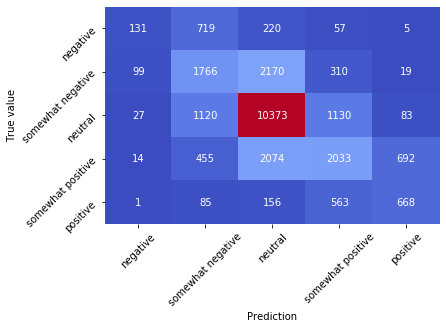


* * * Training * * *
Train Epoch:   2 [     0/ 99878 (0%)]	Loss: 0.937302
Train Epoch:   2 [  5120/ 99878 (5%)]	Loss: 0.917055
Train Epoch:   2 [ 10240/ 99878 (10%)]	Loss: 0.928397
Train Epoch:   2 [ 15360/ 99878 (15%)]	Loss: 0.905761
Train Epoch:   2 [ 20480/ 99878 (20%)]	Loss: 0.864123
Train Epoch:   2 [ 25600/ 99878 (26%)]	Loss: 0.886930
Train Epoch:   2 [ 30720/ 99878 (31%)]	Loss: 0.901886
Train Epoch:   2 [ 35840/ 99878 (36%)]	Loss: 0.854473
Train Epoch:   2 [ 40960/ 99878 (41%)]	Loss: 0.887281
Train Epoch:   2 [ 46080/ 99878 (46%)]	Loss: 0.827434
Train Epoch:   2 [ 51200/ 99878 (51%)]	Loss: 0.922417
Train Epoch:   2 [ 56320/ 99878 (56%)]	Loss: 0.844302
Train Epoch:   2 [ 61440/ 99878 (61%)]	Loss: 0.907918
Train Epoch:   2 [ 66560/ 99878 (66%)]	Loss: 0.906892
Train Epoch:   2 [ 71680/ 99878 (71%)]	Loss: 0.832078
Train Epoch:   2 [ 76800/ 99878 (77%)]	Loss: 0.845994
Train Epoch:   2 [ 81920/ 99878 (82%)]	Loss: 0.910173
Train Epoch:   2 [ 87040/ 99878 (87%)]	Loss: 0.858000
Train Ep

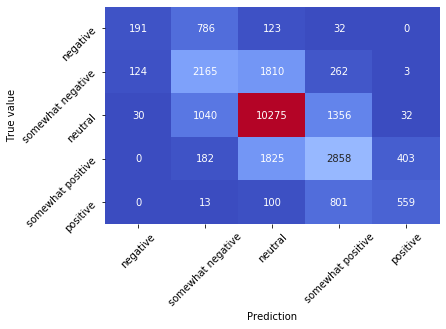


* * * Training * * *
Train Epoch:   3 [     0/ 99878 (0%)]	Loss: 0.768129
Train Epoch:   3 [  5120/ 99878 (5%)]	Loss: 0.762099
Train Epoch:   3 [ 10240/ 99878 (10%)]	Loss: 0.741941
Train Epoch:   3 [ 15360/ 99878 (15%)]	Loss: 0.744158
Train Epoch:   3 [ 20480/ 99878 (20%)]	Loss: 0.757844
Train Epoch:   3 [ 25600/ 99878 (26%)]	Loss: 0.744901
Train Epoch:   3 [ 30720/ 99878 (31%)]	Loss: 0.728180
Train Epoch:   3 [ 35840/ 99878 (36%)]	Loss: 0.765033
Train Epoch:   3 [ 40960/ 99878 (41%)]	Loss: 0.748198
Train Epoch:   3 [ 46080/ 99878 (46%)]	Loss: 0.746162
Train Epoch:   3 [ 51200/ 99878 (51%)]	Loss: 0.796893
Train Epoch:   3 [ 56320/ 99878 (56%)]	Loss: 0.725741
Train Epoch:   3 [ 61440/ 99878 (61%)]	Loss: 0.751261
Train Epoch:   3 [ 66560/ 99878 (66%)]	Loss: 0.746659
Train Epoch:   3 [ 71680/ 99878 (71%)]	Loss: 0.733464
Train Epoch:   3 [ 76800/ 99878 (77%)]	Loss: 0.757716
Train Epoch:   3 [ 81920/ 99878 (82%)]	Loss: 0.808969
Train Epoch:   3 [ 87040/ 99878 (87%)]	Loss: 0.768868
Train Ep

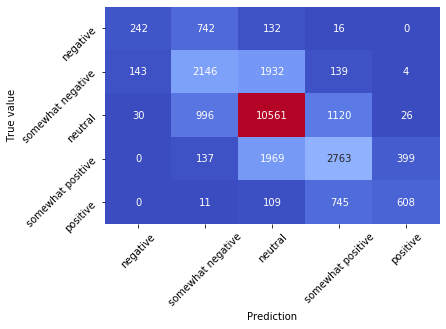


* * * Training * * *
Train Epoch:   4 [     0/ 99878 (0%)]	Loss: 0.653556
Train Epoch:   4 [  5120/ 99878 (5%)]	Loss: 0.683541
Train Epoch:   4 [ 10240/ 99878 (10%)]	Loss: 0.660101
Train Epoch:   4 [ 15360/ 99878 (15%)]	Loss: 0.641260
Train Epoch:   4 [ 20480/ 99878 (20%)]	Loss: 0.633877
Train Epoch:   4 [ 25600/ 99878 (26%)]	Loss: 0.630228
Train Epoch:   4 [ 30720/ 99878 (31%)]	Loss: 0.661786
Train Epoch:   4 [ 35840/ 99878 (36%)]	Loss: 0.644359
Train Epoch:   4 [ 40960/ 99878 (41%)]	Loss: 0.628048
Train Epoch:   4 [ 46080/ 99878 (46%)]	Loss: 0.663008
Train Epoch:   4 [ 51200/ 99878 (51%)]	Loss: 0.654629
Train Epoch:   4 [ 56320/ 99878 (56%)]	Loss: 0.653873
Train Epoch:   4 [ 61440/ 99878 (61%)]	Loss: 0.647433
Train Epoch:   4 [ 66560/ 99878 (66%)]	Loss: 0.665561
Train Epoch:   4 [ 71680/ 99878 (71%)]	Loss: 0.665762
Train Epoch:   4 [ 76800/ 99878 (77%)]	Loss: 0.605914
Train Epoch:   4 [ 81920/ 99878 (82%)]	Loss: 0.649013
Train Epoch:   4 [ 87040/ 99878 (87%)]	Loss: 0.613605
Train Ep

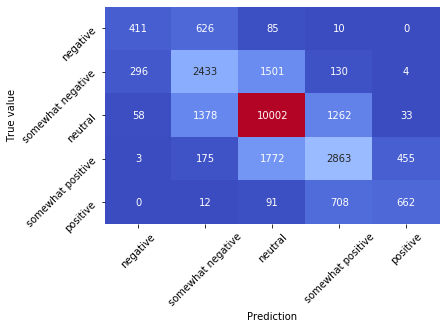


* * * Training * * *
Train Epoch:   5 [     0/ 99878 (0%)]	Loss: 0.618655
Train Epoch:   5 [  5120/ 99878 (5%)]	Loss: 0.632342
Train Epoch:   5 [ 10240/ 99878 (10%)]	Loss: 0.606221
Train Epoch:   5 [ 15360/ 99878 (15%)]	Loss: 0.563661
Train Epoch:   5 [ 20480/ 99878 (20%)]	Loss: 0.609221
Train Epoch:   5 [ 25600/ 99878 (26%)]	Loss: 0.603447
Train Epoch:   5 [ 30720/ 99878 (31%)]	Loss: 0.608760
Train Epoch:   5 [ 35840/ 99878 (36%)]	Loss: 0.647208
Train Epoch:   5 [ 40960/ 99878 (41%)]	Loss: 0.668468
Train Epoch:   5 [ 46080/ 99878 (46%)]	Loss: 0.643850
Train Epoch:   5 [ 51200/ 99878 (51%)]	Loss: 0.632616
Train Epoch:   5 [ 56320/ 99878 (56%)]	Loss: 0.651566
Train Epoch:   5 [ 61440/ 99878 (61%)]	Loss: 0.636042
Train Epoch:   5 [ 66560/ 99878 (66%)]	Loss: 0.597852
Train Epoch:   5 [ 71680/ 99878 (71%)]	Loss: 0.607381
Train Epoch:   5 [ 76800/ 99878 (77%)]	Loss: 0.675982
Train Epoch:   5 [ 81920/ 99878 (82%)]	Loss: 0.585432
Train Epoch:   5 [ 87040/ 99878 (87%)]	Loss: 0.597224
Train Ep

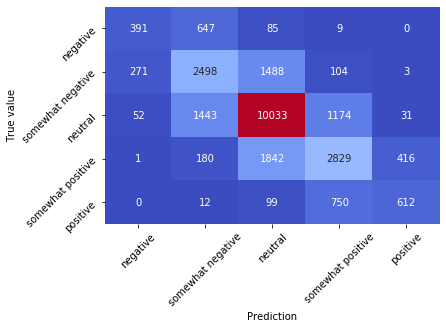


* * * Training * * *
Train Epoch:   6 [     0/ 99878 (0%)]	Loss: 0.618068
Train Epoch:   6 [  5120/ 99878 (5%)]	Loss: 0.581222
Train Epoch:   6 [ 10240/ 99878 (10%)]	Loss: 0.592566
Train Epoch:   6 [ 15360/ 99878 (15%)]	Loss: 0.598693
Train Epoch:   6 [ 20480/ 99878 (20%)]	Loss: 0.606448
Train Epoch:   6 [ 25600/ 99878 (26%)]	Loss: 0.613228
Train Epoch:   6 [ 30720/ 99878 (31%)]	Loss: 0.548503
Train Epoch:   6 [ 35840/ 99878 (36%)]	Loss: 0.621884
Train Epoch:   6 [ 40960/ 99878 (41%)]	Loss: 0.628872
Train Epoch:   6 [ 46080/ 99878 (46%)]	Loss: 0.604283
Train Epoch:   6 [ 51200/ 99878 (51%)]	Loss: 0.578141
Train Epoch:   6 [ 56320/ 99878 (56%)]	Loss: 0.627591
Train Epoch:   6 [ 61440/ 99878 (61%)]	Loss: 0.602263
Train Epoch:   6 [ 66560/ 99878 (66%)]	Loss: 0.638852
Train Epoch:   6 [ 71680/ 99878 (71%)]	Loss: 0.586553
Train Epoch:   6 [ 76800/ 99878 (77%)]	Loss: 0.610292
Train Epoch:   6 [ 81920/ 99878 (82%)]	Loss: 0.614959
Train Epoch:   6 [ 87040/ 99878 (87%)]	Loss: 0.575475
Train Ep

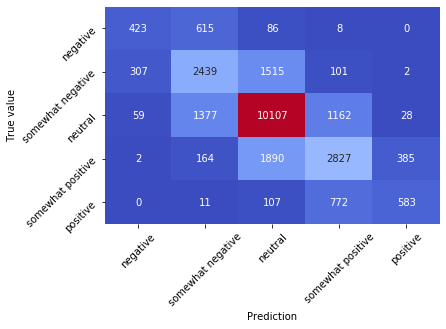


* * * Training * * *
Train Epoch:   7 [     0/ 99878 (0%)]	Loss: 0.534885
Train Epoch:   7 [  5120/ 99878 (5%)]	Loss: 0.559386
Train Epoch:   7 [ 10240/ 99878 (10%)]	Loss: 0.550634
Train Epoch:   7 [ 15360/ 99878 (15%)]	Loss: 0.594740
Train Epoch:   7 [ 20480/ 99878 (20%)]	Loss: 0.577373
Train Epoch:   7 [ 25600/ 99878 (26%)]	Loss: 0.580602
Train Epoch:   7 [ 30720/ 99878 (31%)]	Loss: 0.548283
Train Epoch:   7 [ 35840/ 99878 (36%)]	Loss: 0.591646
Train Epoch:   7 [ 40960/ 99878 (41%)]	Loss: 0.591555
Train Epoch:   7 [ 46080/ 99878 (46%)]	Loss: 0.611760
Train Epoch:   7 [ 51200/ 99878 (51%)]	Loss: 0.610342
Train Epoch:   7 [ 56320/ 99878 (56%)]	Loss: 0.575468
Train Epoch:   7 [ 61440/ 99878 (61%)]	Loss: 0.595071
Train Epoch:   7 [ 66560/ 99878 (66%)]	Loss: 0.574988
Train Epoch:   7 [ 71680/ 99878 (71%)]	Loss: 0.589476
Train Epoch:   7 [ 76800/ 99878 (77%)]	Loss: 0.577218
Train Epoch:   7 [ 81920/ 99878 (82%)]	Loss: 0.584216
Train Epoch:   7 [ 87040/ 99878 (87%)]	Loss: 0.602877
Train Ep

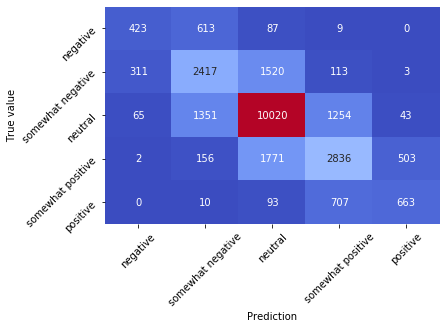


* * * Training * * *
Train Epoch:   8 [     0/ 99878 (0%)]	Loss: 0.612851
Train Epoch:   8 [  5120/ 99878 (5%)]	Loss: 0.585015
Train Epoch:   8 [ 10240/ 99878 (10%)]	Loss: 0.569118
Train Epoch:   8 [ 15360/ 99878 (15%)]	Loss: 0.547496
Train Epoch:   8 [ 20480/ 99878 (20%)]	Loss: 0.625700
Train Epoch:   8 [ 25600/ 99878 (26%)]	Loss: 0.546087
Train Epoch:   8 [ 30720/ 99878 (31%)]	Loss: 0.546482
Train Epoch:   8 [ 35840/ 99878 (36%)]	Loss: 0.548572
Train Epoch:   8 [ 40960/ 99878 (41%)]	Loss: 0.596111
Train Epoch:   8 [ 46080/ 99878 (46%)]	Loss: 0.577924
Train Epoch:   8 [ 51200/ 99878 (51%)]	Loss: 0.612261
Train Epoch:   8 [ 56320/ 99878 (56%)]	Loss: 0.540882
Train Epoch:   8 [ 61440/ 99878 (61%)]	Loss: 0.607483
Train Epoch:   8 [ 66560/ 99878 (66%)]	Loss: 0.540168
Train Epoch:   8 [ 71680/ 99878 (71%)]	Loss: 0.625682
Train Epoch:   8 [ 76800/ 99878 (77%)]	Loss: 0.621541
Train Epoch:   8 [ 81920/ 99878 (82%)]	Loss: 0.589823
Train Epoch:   8 [ 87040/ 99878 (87%)]	Loss: 0.545517
Train Ep

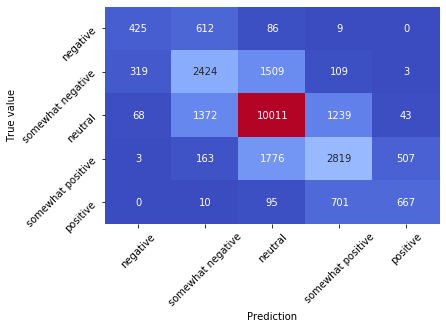


* * * Training * * *
Train Epoch:   9 [     0/ 99878 (0%)]	Loss: 0.524783
Train Epoch:   9 [  5120/ 99878 (5%)]	Loss: 0.587444
Train Epoch:   9 [ 10240/ 99878 (10%)]	Loss: 0.574246
Train Epoch:   9 [ 15360/ 99878 (15%)]	Loss: 0.605966
Train Epoch:   9 [ 20480/ 99878 (20%)]	Loss: 0.589720
Train Epoch:   9 [ 25600/ 99878 (26%)]	Loss: 0.562295
Train Epoch:   9 [ 30720/ 99878 (31%)]	Loss: 0.560099
Train Epoch:   9 [ 35840/ 99878 (36%)]	Loss: 0.579183
Train Epoch:   9 [ 40960/ 99878 (41%)]	Loss: 0.562825
Train Epoch:   9 [ 46080/ 99878 (46%)]	Loss: 0.589467
Train Epoch:   9 [ 51200/ 99878 (51%)]	Loss: 0.582864
Train Epoch:   9 [ 56320/ 99878 (56%)]	Loss: 0.566839
Train Epoch:   9 [ 61440/ 99878 (61%)]	Loss: 0.573113
Train Epoch:   9 [ 66560/ 99878 (66%)]	Loss: 0.576522
Train Epoch:   9 [ 71680/ 99878 (71%)]	Loss: 0.589899
Train Epoch:   9 [ 76800/ 99878 (77%)]	Loss: 0.536815
Train Epoch:   9 [ 81920/ 99878 (82%)]	Loss: 0.567510
Train Epoch:   9 [ 87040/ 99878 (87%)]	Loss: 0.575708
Train Ep

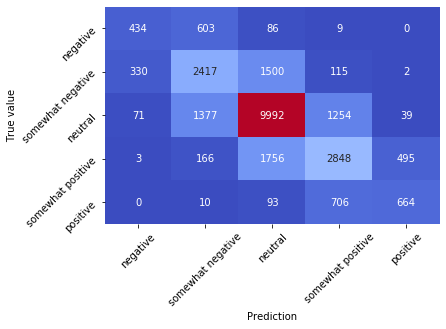


* * * Training * * *
Train Epoch:  10 [     0/ 99878 (0%)]	Loss: 0.562320
Train Epoch:  10 [  5120/ 99878 (5%)]	Loss: 0.562322
Train Epoch:  10 [ 10240/ 99878 (10%)]	Loss: 0.625973
Train Epoch:  10 [ 15360/ 99878 (15%)]	Loss: 0.639355
Train Epoch:  10 [ 20480/ 99878 (20%)]	Loss: 0.563942
Train Epoch:  10 [ 25600/ 99878 (26%)]	Loss: 0.576292
Train Epoch:  10 [ 30720/ 99878 (31%)]	Loss: 0.569311
Train Epoch:  10 [ 35840/ 99878 (36%)]	Loss: 0.580421
Train Epoch:  10 [ 40960/ 99878 (41%)]	Loss: 0.574695
Train Epoch:  10 [ 46080/ 99878 (46%)]	Loss: 0.534627
Train Epoch:  10 [ 51200/ 99878 (51%)]	Loss: 0.561555
Train Epoch:  10 [ 56320/ 99878 (56%)]	Loss: 0.563555
Train Epoch:  10 [ 61440/ 99878 (61%)]	Loss: 0.558784
Train Epoch:  10 [ 66560/ 99878 (66%)]	Loss: 0.586529
Train Epoch:  10 [ 71680/ 99878 (71%)]	Loss: 0.620139
Train Epoch:  10 [ 76800/ 99878 (77%)]	Loss: 0.571109
Train Epoch:  10 [ 81920/ 99878 (82%)]	Loss: 0.590337
Train Epoch:  10 [ 87040/ 99878 (87%)]	Loss: 0.536033
Train Ep

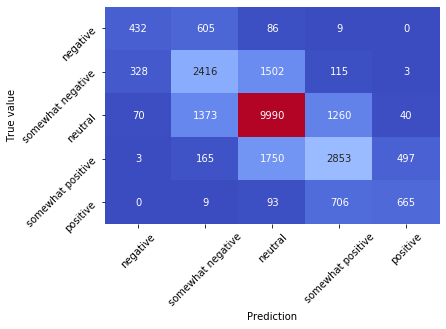


* * * Training * * *
Train Epoch:  11 [     0/ 99878 (0%)]	Loss: 0.581320
Train Epoch:  11 [  5120/ 99878 (5%)]	Loss: 0.564661
Train Epoch:  11 [ 10240/ 99878 (10%)]	Loss: 0.574675
Train Epoch:  11 [ 15360/ 99878 (15%)]	Loss: 0.563416
Train Epoch:  11 [ 20480/ 99878 (20%)]	Loss: 0.599639
Train Epoch:  11 [ 25600/ 99878 (26%)]	Loss: 0.551200
Train Epoch:  11 [ 30720/ 99878 (31%)]	Loss: 0.554908
Train Epoch:  11 [ 35840/ 99878 (36%)]	Loss: 0.599333
Train Epoch:  11 [ 40960/ 99878 (41%)]	Loss: 0.601423
Train Epoch:  11 [ 46080/ 99878 (46%)]	Loss: 0.626325
Train Epoch:  11 [ 51200/ 99878 (51%)]	Loss: 0.586999
Train Epoch:  11 [ 56320/ 99878 (56%)]	Loss: 0.618497
Train Epoch:  11 [ 61440/ 99878 (61%)]	Loss: 0.581762
Train Epoch:  11 [ 66560/ 99878 (66%)]	Loss: 0.536263
Train Epoch:  11 [ 71680/ 99878 (71%)]	Loss: 0.530423
Train Epoch:  11 [ 76800/ 99878 (77%)]	Loss: 0.572461
Train Epoch:  11 [ 81920/ 99878 (82%)]	Loss: 0.575512
Train Epoch:  11 [ 87040/ 99878 (87%)]	Loss: 0.556325
Train Ep

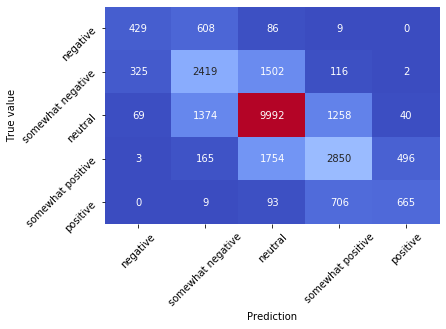


* * * Training * * *
Train Epoch:  12 [     0/ 99878 (0%)]	Loss: 0.548921
Train Epoch:  12 [  5120/ 99878 (5%)]	Loss: 0.578564
Train Epoch:  12 [ 10240/ 99878 (10%)]	Loss: 0.598905
Train Epoch:  12 [ 15360/ 99878 (15%)]	Loss: 0.568241
Train Epoch:  12 [ 20480/ 99878 (20%)]	Loss: 0.615960
Train Epoch:  12 [ 25600/ 99878 (26%)]	Loss: 0.527679
Train Epoch:  12 [ 30720/ 99878 (31%)]	Loss: 0.563993
Train Epoch:  12 [ 35840/ 99878 (36%)]	Loss: 0.577312
Train Epoch:  12 [ 40960/ 99878 (41%)]	Loss: 0.601303
Train Epoch:  12 [ 46080/ 99878 (46%)]	Loss: 0.542400
Train Epoch:  12 [ 51200/ 99878 (51%)]	Loss: 0.571372
Train Epoch:  12 [ 56320/ 99878 (56%)]	Loss: 0.559034
Train Epoch:  12 [ 61440/ 99878 (61%)]	Loss: 0.580196
Train Epoch:  12 [ 66560/ 99878 (66%)]	Loss: 0.541315
Train Epoch:  12 [ 71680/ 99878 (71%)]	Loss: 0.542626
Train Epoch:  12 [ 76800/ 99878 (77%)]	Loss: 0.610850
Train Epoch:  12 [ 81920/ 99878 (82%)]	Loss: 0.578618
Train Epoch:  12 [ 87040/ 99878 (87%)]	Loss: 0.606209
Train Ep

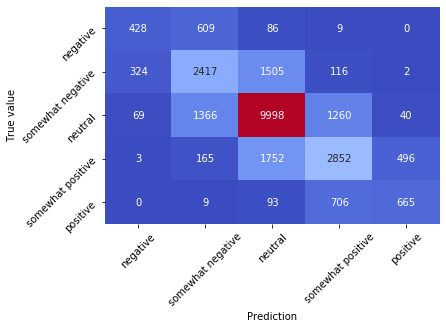

In [12]:
history = train(
    model=model, train_loader=train_loader, test_loader=valid_loader, classes=classes,
    device=device, optimizer=optimizer, lr_scheduler=lr_scheduler,
    nb_epochs=nb_epochs, log_interval=log_interval
)

### Resultados do treino

In [13]:
print('Max val acc: {:.2f}%'.format(max(history['val_acc'])))

Max val acc: 65.59%


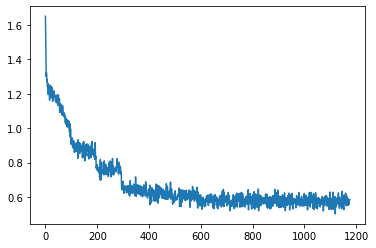

In [14]:
plt.plot(history['train_loss'])
plt.show()

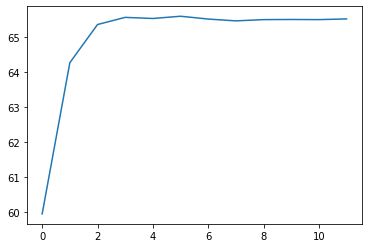

In [15]:
plt.plot(history['val_acc'])
plt.show()